In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## stage 1 Data Understanding 
## load and read the dataset
df = pd.read_csv('final_internship_data.csv')

In [3]:
df.head(5)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
df.tail(5)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
499999,qGKn4Um5,Eric Jones,Julie King,Very Good,sunny,Flow Traffic,2010-04-12 23:46:58.0000002,4.9,2010-04-12 23:46:58,-1.291312,...,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


In [5]:
df.shape

(500000, 26)

In [6]:
df.dtypes

User ID               object
User Name             object
Driver Name           object
Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [9]:
# since i have features derived from longtitude and latitude no need for these columns for my analysis
df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],inplace=True, axis=1)
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')

In [10]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')

In [11]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.describe()

,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [14]:
d = 0
num_people = df[df['distance'] == d].shape[0]
print(f"Number of people who traveled {d} units: {num_people}")

Number of people who traveled 0 units: 14250


In [15]:
d = 0
num_people = df[df['fare_amount'] <= 0].shape[0]
print(f"number of people who paid 0 or less is: {num_people}")

number of people who paid 0 or less is: 35


In [16]:
d = 0
num_people = df[df['passenger_count'] <= 0].shape[0]
print(f"number of people who booked is 0 is: {num_people}")

number of people who booked is 0 is: 1791


In [17]:
#Calculate mean or median distance
mean_distance = df['distance'].mean()
median_distance = df['distance'].median()

# Impute zero distances with the median
df['distance'] = df['distance'].replace(0, median_distance)

# Verify imputation
print(df[df['distance'] == 0].shape[0])  # Should be zero

0


In [18]:
# Remove rows with invalid fare_amount
df = df[df['fare_amount'] > 0]

# Remove rows with invalid passenger_count
df = df[df['passenger_count'] > 0]

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


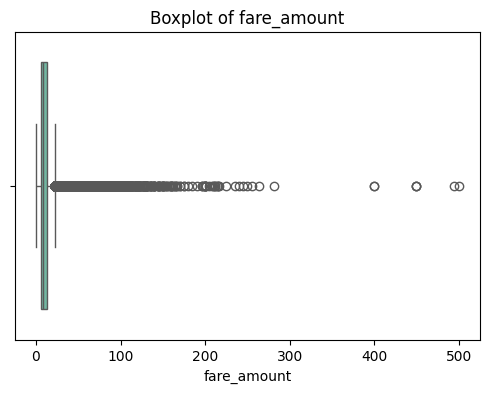

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


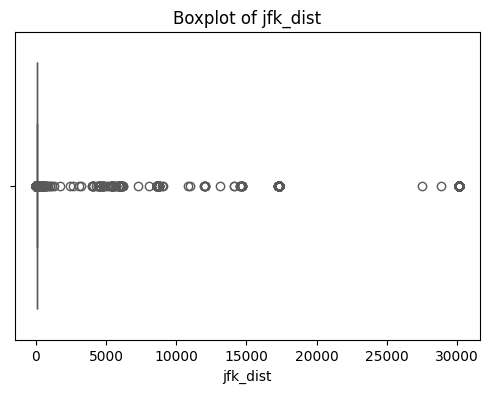

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


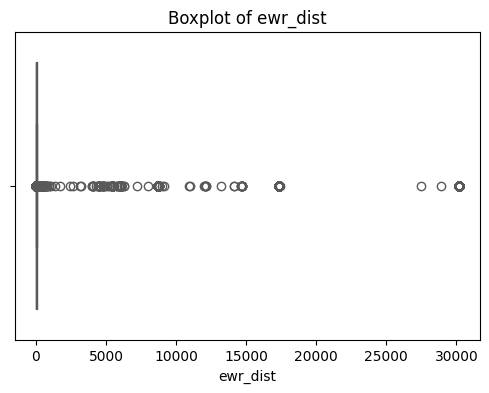

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


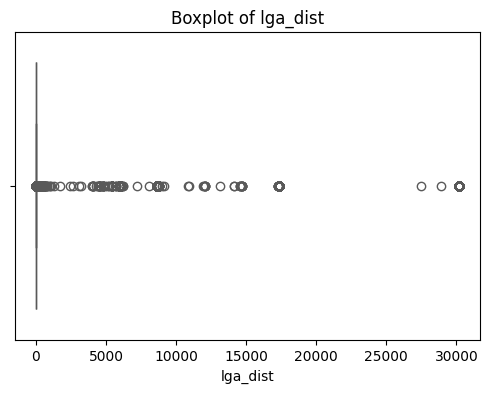

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


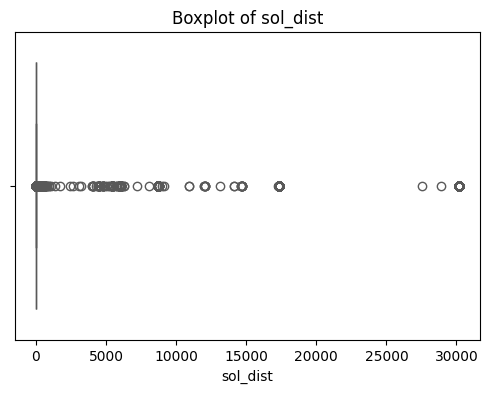

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


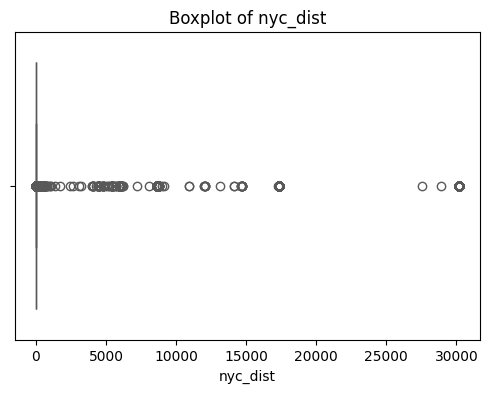

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1239130719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


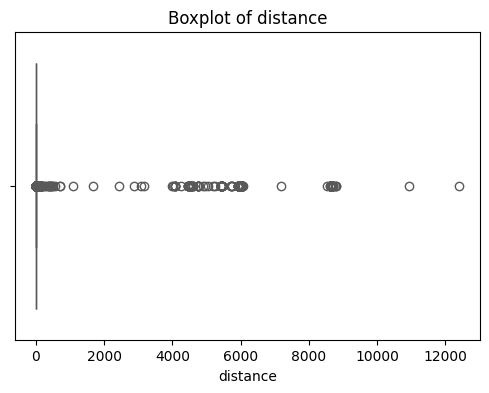

In [75]:
numeric_columns = [
    'fare_amount',
    'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',]

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f"Boxplot of {column}")
    plt.show()

In [76]:
## get copy of the dataset to avoid any problems on the real dataset
df_copy = df.copy()

In [77]:
for col in numeric_columns:
    print(f"Skewness of {col}: {df_copy[col].skew()}")

Skewness of fare_amount: 4.8982749924944295
Skewness of jfk_dist: 7.166593247138619
Skewness of ewr_dist: 7.163241681280367
Skewness of lga_dist: 7.16582046066228
Skewness of sol_dist: 7.1637992706126505
Skewness of nyc_dist: 7.164029444533879
Skewness of distance: 23.144087915625953


In [78]:
## loop through all columns, check if its a number, then calculate IQR
for col in numeric_columns:
    if df_copy[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Calculate Q1, Q3, and IQR
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the mode
        mode_value = df_copy[col].mode()[0]

        # Replace outliers with the mode
        df_copy[col] = np.where((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), mode_value, df_copy[col])


In [79]:
# Check skewness after transformation
for col in numeric_columns:
    if f'{col}' in df_copy.columns:
        print(f"Skewness of {col}_log: {df_copy[f'{col}'].skew()}")



Skewness of fare_amount_log: 1.1426189663760191
Skewness of jfk_dist_log: 2.359057158067619
Skewness of ewr_dist_log: 3.8300934094351766
Skewness of lga_dist_log: 4.3843608696521645
Skewness of sol_dist_log: 4.889787864782429
Skewness of nyc_dist_log: 4.453062424166232
Skewness of distance_log: 1.2194834578036928


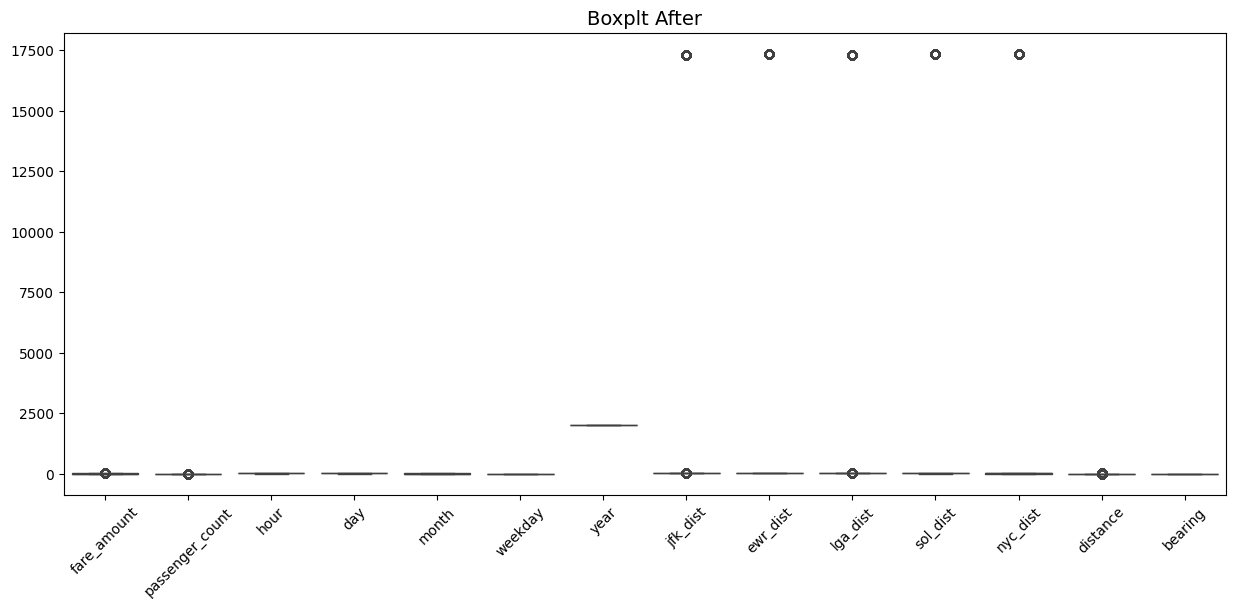

In [80]:
# plot outliers After 
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_copy)
plt.xticks(rotation=45)  
plt.title("Boxplt After", fontsize=14)
plt.show()


In [81]:
df.head(5)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,passenger_count,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,1,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,1,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,2,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,1,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,1,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


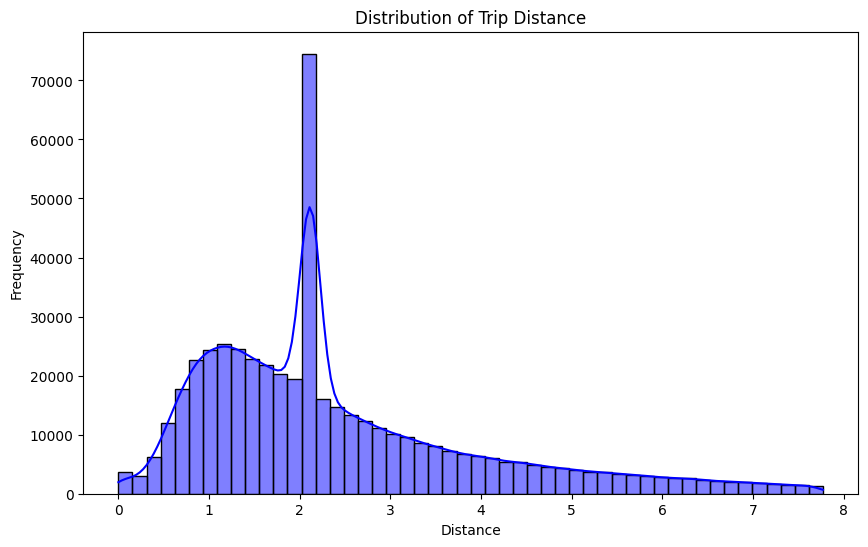

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['distance'], bins=50, kde=True, color='blue')
plt.title("Distribution of Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [83]:
# Calculate the most common distance
most_common_distance = df['distance'].mode()[0]
print(f"Most Common Distance Traveled: {most_common_distance:.2f} units")

Most Common Distance Traveled: 2.12 units


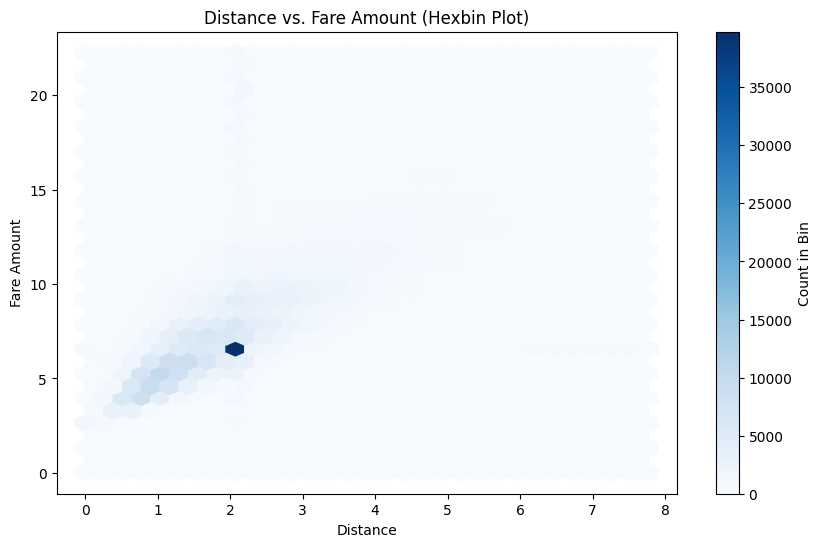

In [84]:
# Hexbin plot: Distance vs. Fare Amount
plt.figure(figsize=(10, 6))
plt.hexbin(df_copy['distance'], df_copy['fare_amount'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title("Distance vs. Fare Amount (Hexbin Plot)")
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.show()

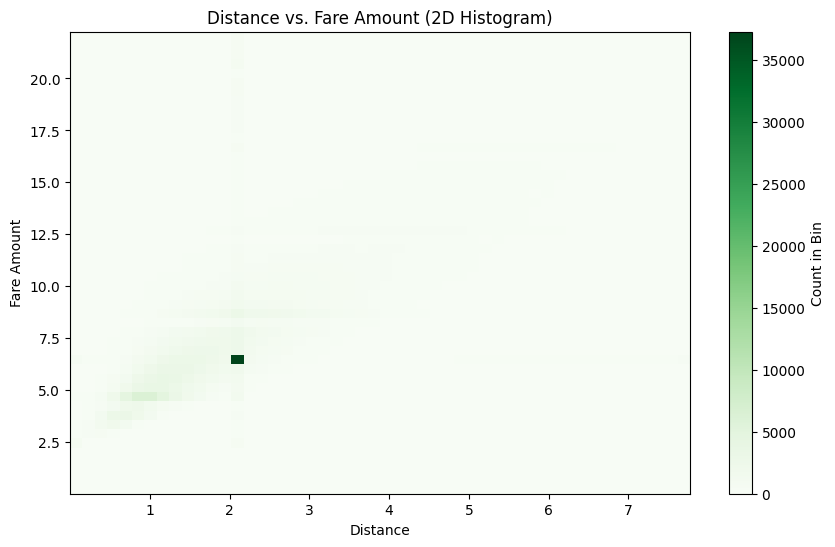

In [85]:
# 2D Histogram: Distance vs. Fare Amount
plt.figure(figsize=(10, 6))
plt.hist2d(df_copy['distance'], df_copy['fare_amount'], bins=(50, 50), cmap='Greens')
plt.colorbar(label='Count in Bin')
plt.title("Distance vs. Fare Amount (2D Histogram)")
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.show()

## check the highest distance in which people order an uber for, and what is the paid price

In [114]:
# Calculate correlation between distance and fare amount
correlation = df_copy['distance'].corr(df_copy['fare_amount'])

print("Correlation between distance and fare_amount:", correlation)

Correlation between distance and fare_amount: 0.6958266287398971


In [113]:
correlation = df['distance'].corr(df['fare_amount'])

print("Correlation between distance and fare_amount:", correlation)

Correlation between distance and fare_amount: 0.026664530927473673


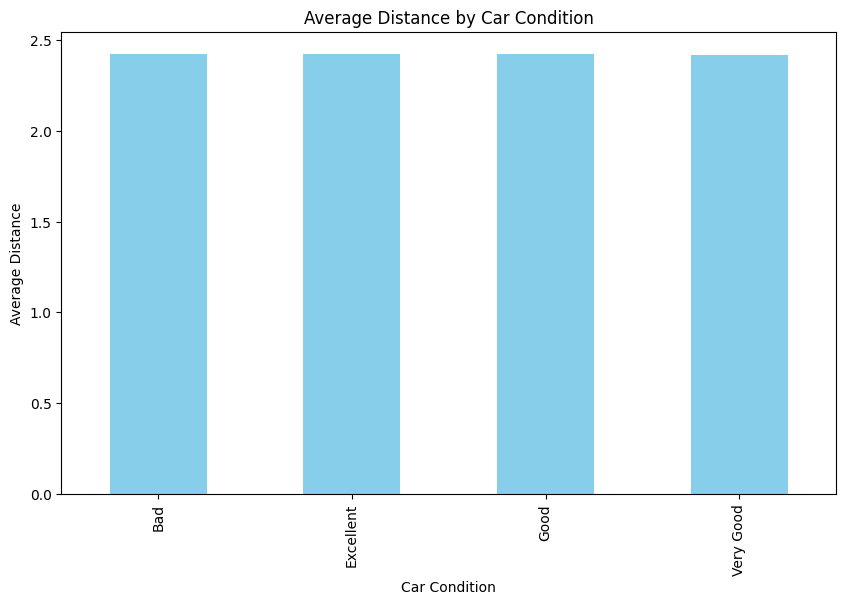

In [87]:
# Bar plot: Average Distance by Weather Condition
plt.figure(figsize=(10, 6))
df_copy.groupby('Car Condition')['distance'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Distance by Car Condition")
plt.xlabel("Car Condition")
plt.ylabel("Average Distance")
plt.show()
## goal to check if car condition affects distance 

In [88]:
df['Car Condition'].value_counts()

Car Condition
Very Good    124865
Bad          124533
Good         124472
Excellent    124299
Name: count, dtype: int64

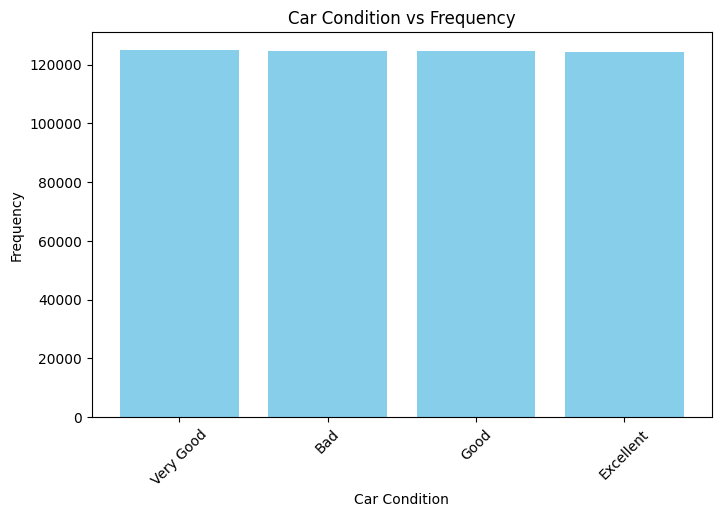

In [89]:

# Count occurrences of each Car Condition
car_condition_counts = df_copy['Car Condition'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(car_condition_counts.index, car_condition_counts.values, color='skyblue')

plt.xlabel("Car Condition")
plt.ylabel("Frequency")
plt.title("Car Condition vs Frequency")
plt.xticks(rotation=45)  
plt.show()


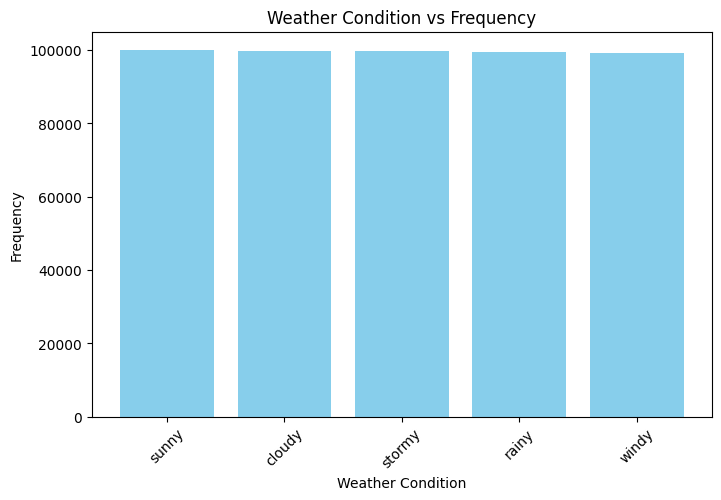

In [90]:

# Count occurrences of each Weather Condition
weather_condition_counts = df_copy['Weather'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(weather_condition_counts.index, weather_condition_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.title("Weather Condition vs Frequency")
plt.xticks(rotation=45)  
plt.show()


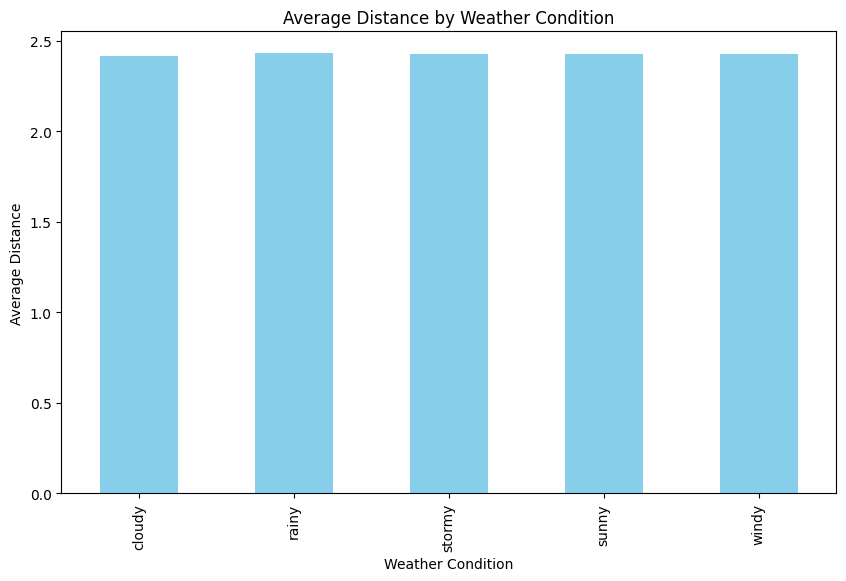

In [91]:
# Bar plot: Average Distance by Weather Condition
plt.figure(figsize=(10, 6))
df_copy.groupby('Weather')['distance'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Distance by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Distance")
plt.show()

In [92]:
df['Weather'].value_counts()

Weather
sunny     100033
cloudy     99707
stormy     99613
rainy      99610
windy      99206
Name: count, dtype: int64

In [95]:
# Group by passenger_count and calculate average distance
avg_distance_by_passengers = df_copy.groupby('passenger_count')['distance'].mean().reset_index()

# Display the result
print(avg_distance_by_passengers)

   passenger_count  distance
0                1  2.412434
1                2  2.456787
2                3  2.458602
3                4  2.481488
4                5  2.425001
5                6  2.446768


C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\3713102017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='fare_amount', data=df_copy, estimator=np.mean, palette='Blues')


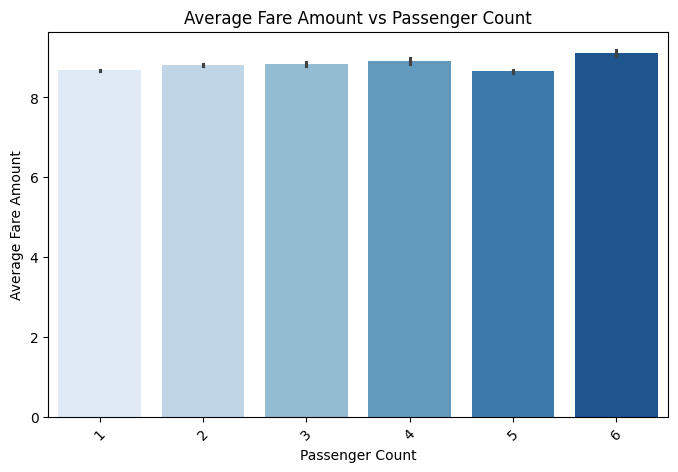

In [99]:


plt.figure(figsize=(8, 5))  # Set figure size

sns.barplot(x='passenger_count', y='fare_amount', data=df_copy, estimator=np.mean, palette='Blues')

plt.xlabel("Passenger Count")
plt.ylabel("Average Fare Amount")
plt.title("Average Fare Amount vs Passenger Count")
plt.xticks(rotation=45)  

plt.show()


C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\2942025592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='distance', data=avg_distance_by_passengers, palette="Set2")


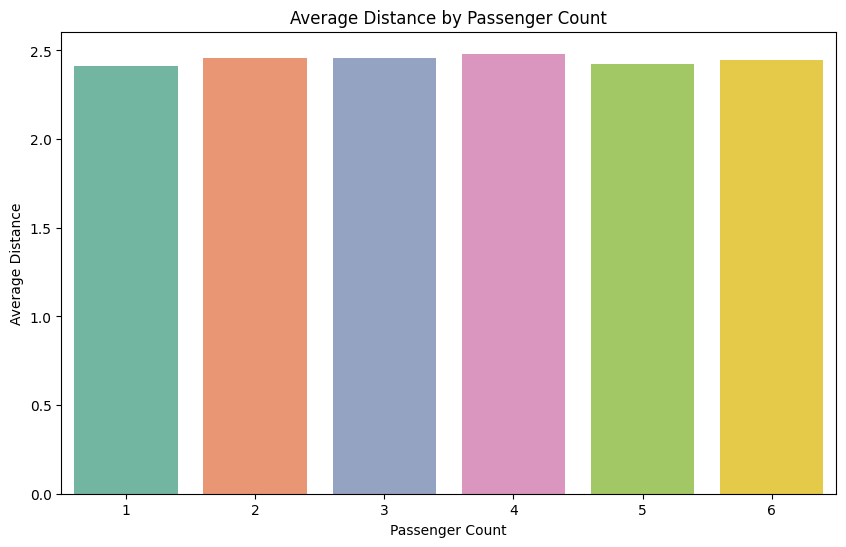

In [96]:
# Bar plot: Average Distance by Passenger Count
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='distance', data=avg_distance_by_passengers, palette="Set2")
plt.title("Average Distance by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Distance")
plt.show()

In [100]:
## what time do people travel for longer distances
# Group by month and sum the distance
total_distance_by_month = df_copy.groupby('month')['distance'].sum().reset_index()

print(total_distance_by_month)

    month       distance
0       1  105098.832132
1       2  100705.142346
2       3  111641.959048
3       4  110898.037739
4       5  114206.654969
5       6  109315.445247
6       7   93091.548239
7       8   87660.483354
8       9   92396.112871
9      10   98961.416477
10     11   91760.404057
11     12   91886.409057


C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\3208563876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='distance', data=total_distance_by_month, palette="Set2")


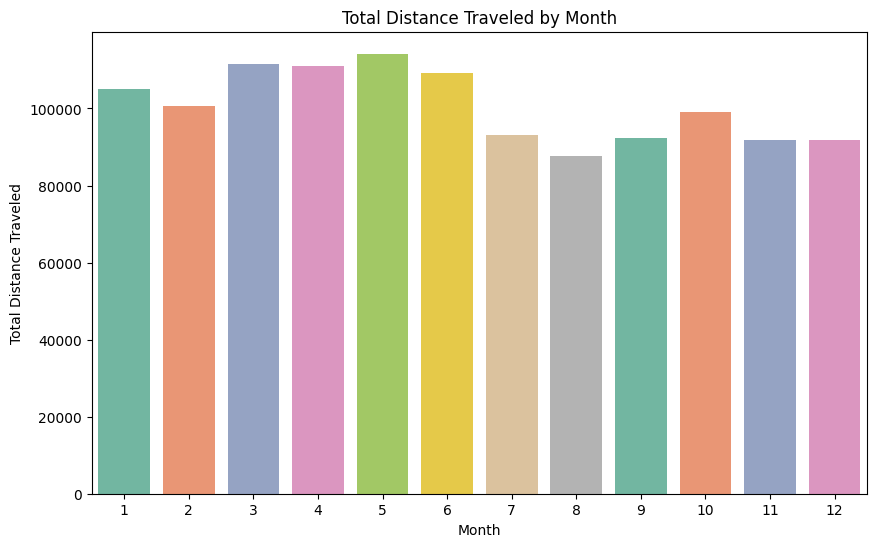

In [101]:
# Bar plot: Total Distance Traveled by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='distance', data=total_distance_by_month, palette="Set2")
plt.title("Total Distance Traveled by Month")
plt.xlabel("Month")
plt.ylabel("Total Distance Traveled")
plt.xticks(rotation=0)  
plt.show()

In [39]:
# Group by month and count the number of rides
rides_by_month = df_copy['month'].value_counts().sort_index()

print(rides_by_month)

month
1     44364
2     42259
3     46461
4     45700
5     46616
6     44725
7     38010
8     35762
9     37872
10    40440
11    37628
12    38332
Name: count, dtype: int64


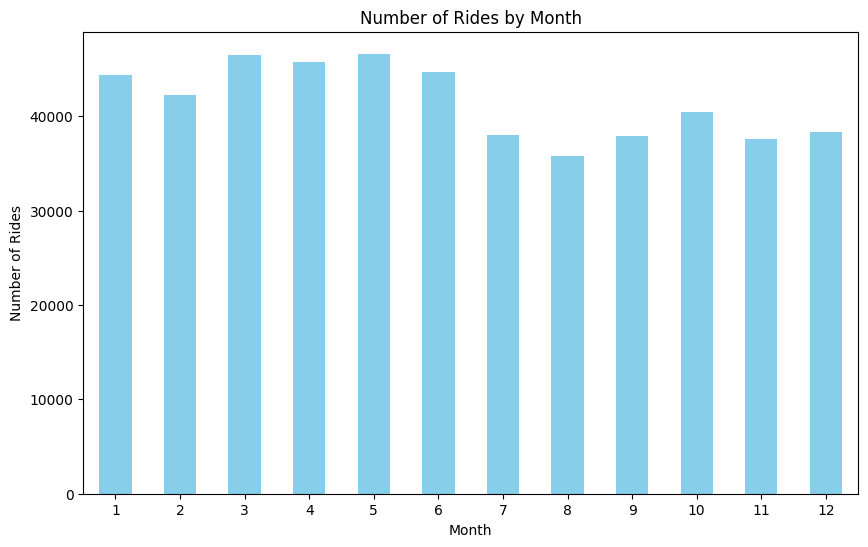

In [40]:
# Bar plot: Number of Rides by Month
plt.figure(figsize=(10, 6))
rides_by_month.plot(kind='bar', color='skyblue')
plt.title("Number of Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0) 
plt.show()

In [41]:
# Group by month and calculate total distance and number of rides
monthly_metrics = df_copy.groupby('month').agg(
    total_distance=('distance', 'sum'),
    num_rides=('distance', 'count')
).reset_index()

print(monthly_metrics)

    month  total_distance  num_rides
0       1   105098.832132      44364
1       2   100705.142346      42259
2       3   111641.959048      46461
3       4   110898.037739      45700
4       5   114206.654969      46616
5       6   109315.445247      44725
6       7    93091.548239      38010
7       8    87660.483354      35762
8       9    92396.112871      37872
9      10    98961.416477      40440
10     11    91760.404057      37628
11     12    91886.409057      38332


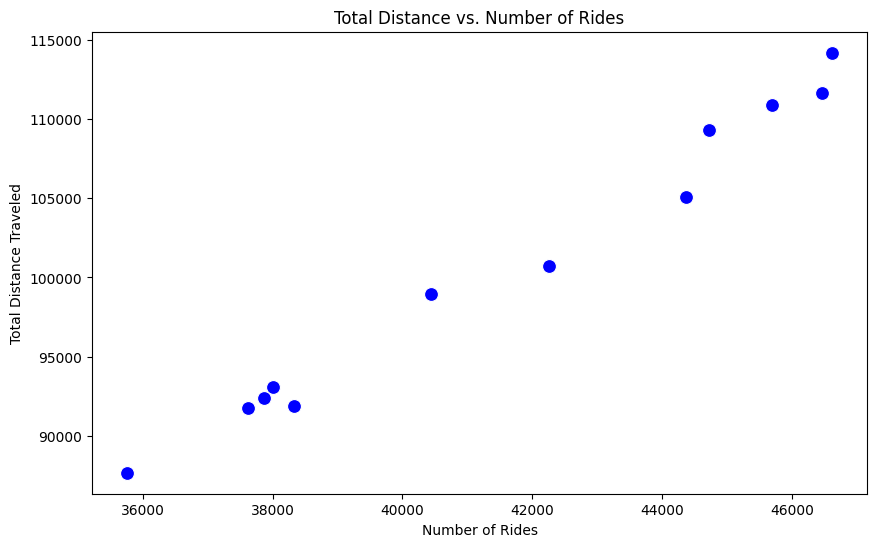

In [42]:
# Scatter plot: Total Distance vs. Number of Rides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_rides', y='total_distance', data=monthly_metrics, s=100, color='blue')
plt.title("Total Distance vs. Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Total Distance Traveled")
plt.show()

In [43]:
# Calculate correlation between total distance and number of rides
correlation = monthly_metrics['total_distance'].corr(monthly_metrics['num_rides'])
print(f"Correlation between Total Distance and Number of Rides: {correlation:.2f}")

Correlation between Total Distance and Number of Rides: 0.99


In [44]:
# Group by hour and count the number of rides
rides_by_hour = df_copy['hour'].value_counts().sort_index()

print(rides_by_hour)

hour
0     19582
1     14510
2     10854
3      7911
4      5846
5      4956
6     10290
7     18164
8     22520
9     23486
10    22339
11    23250
12    24547
13    24303
14    25298
15    23930
16    20479
17    24560
18    29961
19    31262
20    29093
21    28533
22    27720
23    24775
Name: count, dtype: int64


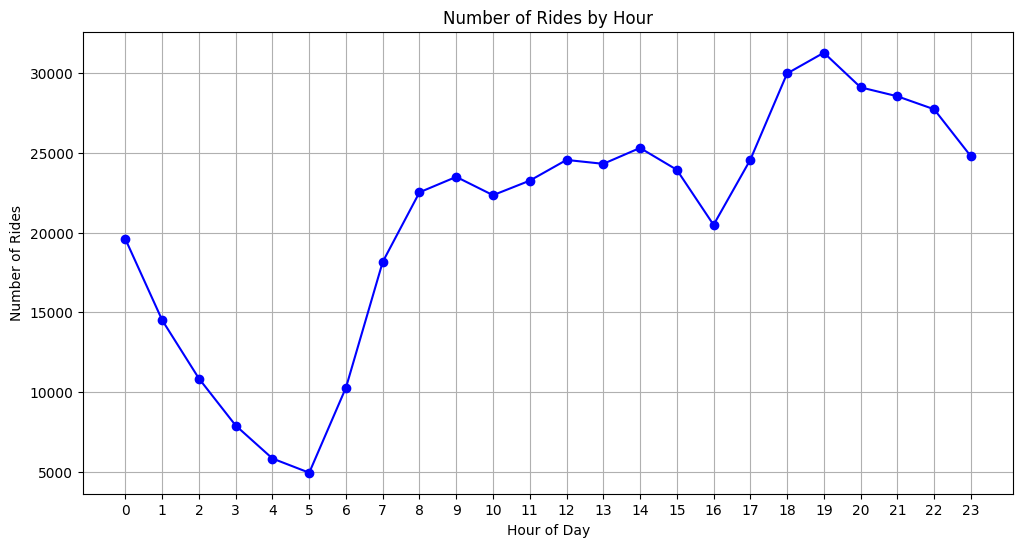

In [45]:
# Line plot: Number of Rides by Hour
plt.figure(figsize=(12, 6))
rides_by_hour.plot(kind='line', marker='o', color='blue')
plt.title("Number of Rides by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.xticks(range(24)) 
plt.grid(True)  
plt.show()

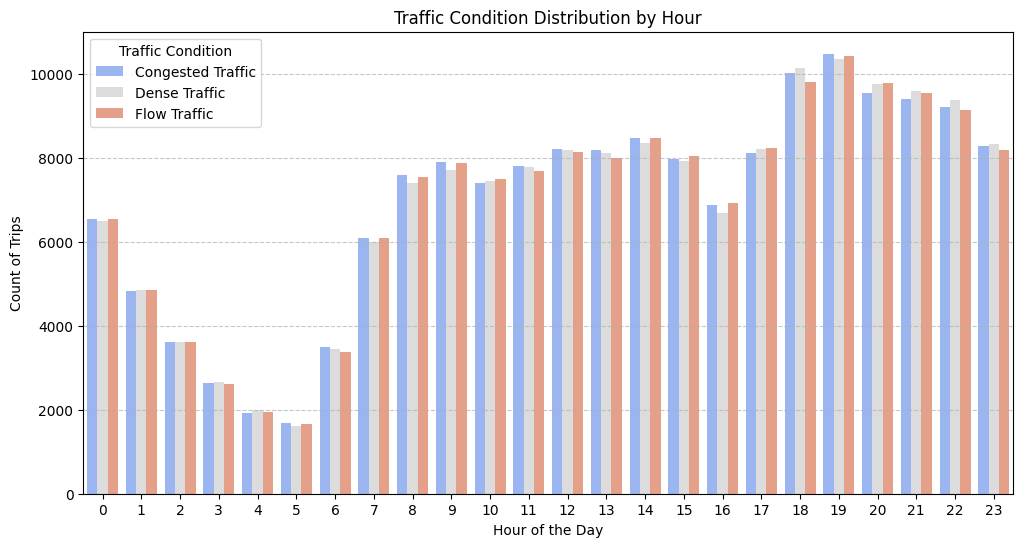

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='Traffic Condition', data=df_copy, palette='coolwarm')
plt.title("Traffic Condition Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.legend(title="Traffic Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
traffic_counts = df_copy.groupby(['hour', 'Traffic Condition']).size().unstack()

# Convert to percentages
traffic_percentages = traffic_counts.div(traffic_counts.sum(axis=1), axis=0) * 100


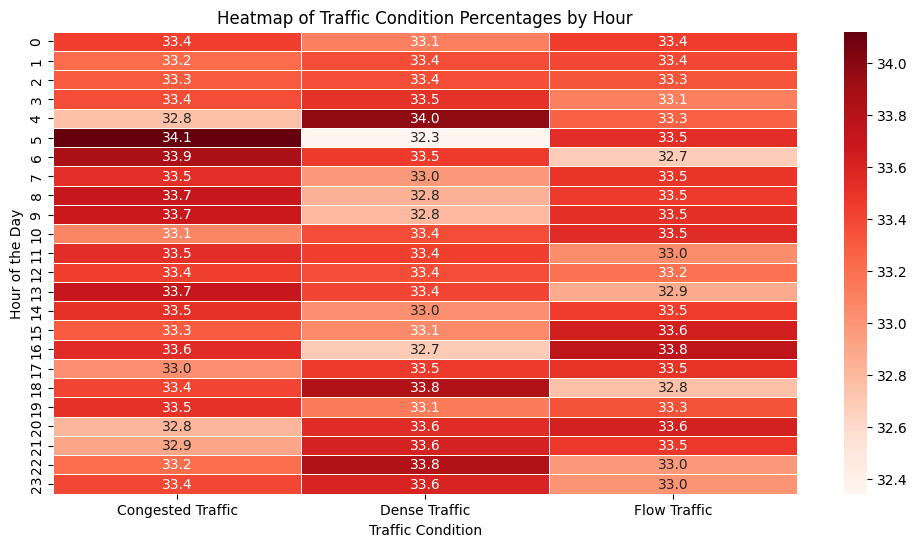

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(traffic_percentages, cmap='Reds', annot=True, fmt=".1f", linewidths=0.5)

plt.title("Heatmap of Traffic Condition Percentages by Hour")
plt.xlabel("Traffic Condition")
plt.ylabel("Hour of the Day")
plt.show()


<Figure size 1200x600 with 0 Axes>

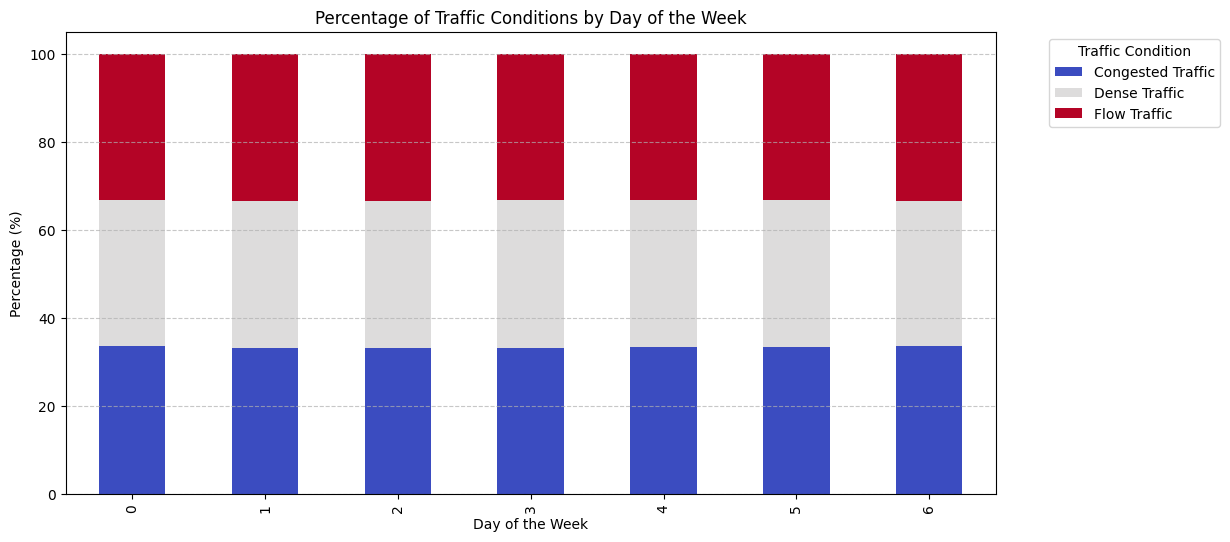

In [50]:
traffic_weekday = df_copy.groupby(['weekday', 'Traffic Condition']).size().unstack()
traffic_weekday_percentage = traffic_weekday.div(traffic_weekday.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
traffic_weekday_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))

plt.title("Percentage of Traffic Conditions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage (%)")
plt.legend(title="Traffic Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\Win 10\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


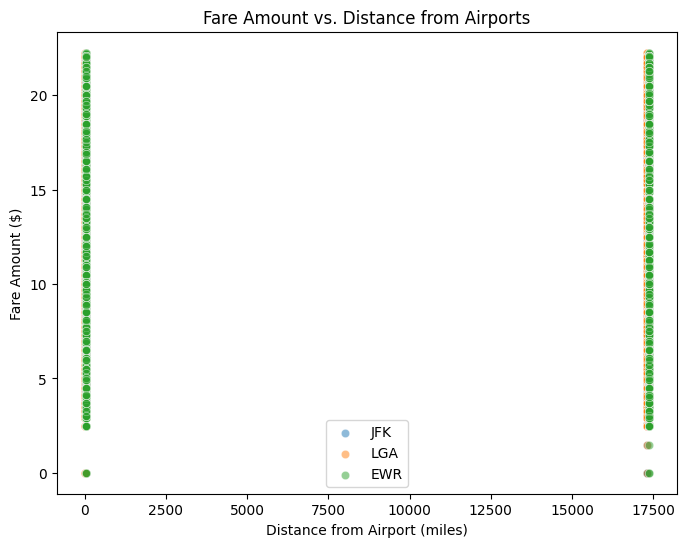

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jfk_dist', y='fare_amount', data=df_copy, alpha=0.5, label="JFK")
sns.scatterplot(x='lga_dist', y='fare_amount', data=df_copy, alpha=0.5, label="LGA")
sns.scatterplot(x='ewr_dist', y='fare_amount', data=df_copy, alpha=0.5, label="EWR")
plt.title("Fare Amount vs. Distance from Airports")
plt.xlabel("Distance from Airport (miles)")
plt.ylabel("Fare Amount ($)")
plt.legend()
plt.show()


C:\Users\Win 10\AppData\Local\Temp\ipykernel_20808\1670917978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather', y='fare_amount', data=df_copy, estimator='mean', palette="coolwarm")


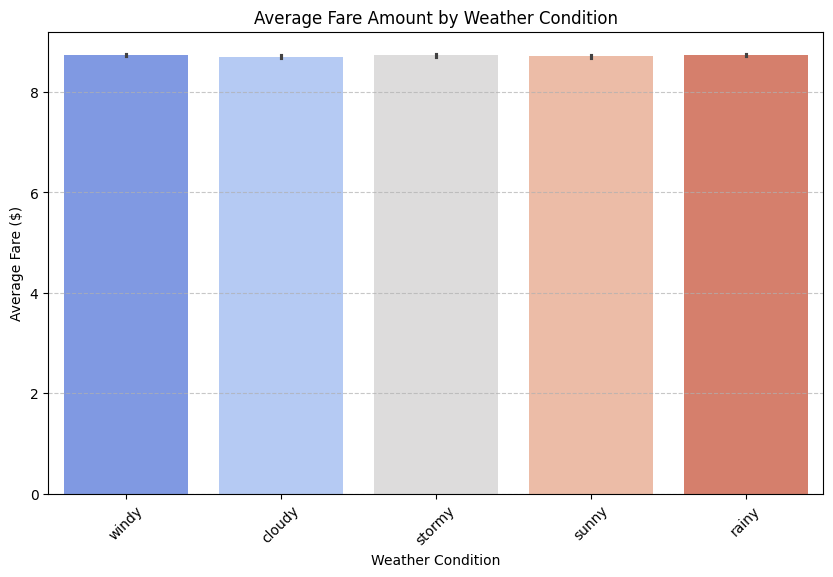

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather', y='fare_amount', data=df_copy, estimator='mean', palette="coolwarm")

plt.title("Average Fare Amount by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Fare ($)")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


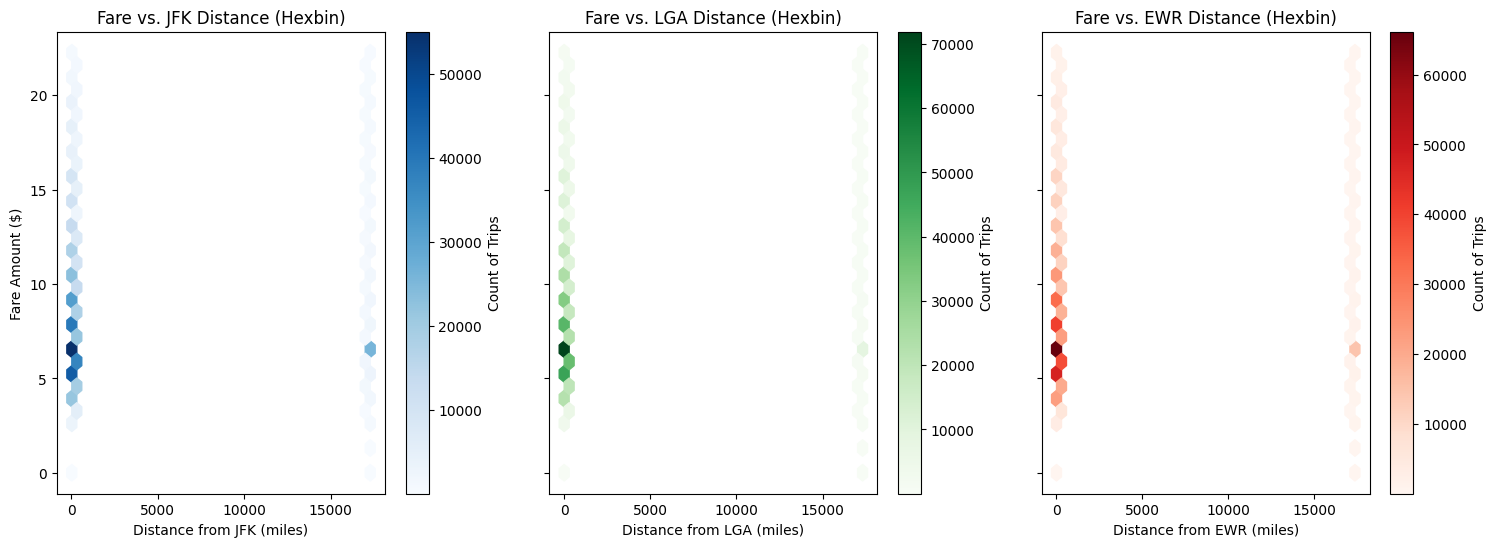

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

hb1 = axes[0].hexbin(df_copy['jfk_dist'], df_copy['fare_amount'], gridsize=30, cmap='Blues', mincnt=1)
axes[0].set_title("Fare vs. JFK Distance (Hexbin)")
axes[0].set_xlabel("Distance from JFK (miles)")
axes[0].set_ylabel("Fare Amount ($)")
fig.colorbar(hb1, ax=axes[0], label="Count of Trips")

# Hexbin Plot for LGA Distance
hb2 = axes[1].hexbin(df_copy['lga_dist'], df_copy['fare_amount'], gridsize=30, cmap='Greens', mincnt=1)
axes[1].set_title("Fare vs. LGA Distance (Hexbin)")
axes[1].set_xlabel("Distance from LGA (miles)")
fig.colorbar(hb2, ax=axes[1], label="Count of Trips")

# Hexbin Plot for EWR Distance
hb3 = axes[2].hexbin(df_copy['ewr_dist'], df_copy['fare_amount'], gridsize=30, cmap='Reds', mincnt=1)
axes[2].set_title("Fare vs. EWR Distance (Hexbin)")
axes[2].set_xlabel("Distance from EWR (miles)")
fig.colorbar(hb3, ax=axes[2], label="Count of Trips")



